## Exploratory Data Analysis (EDA) with Pandas on the cleaned dataset

In [58]:
# imports
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [59]:
# load the cleaned data
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,Title,Text,Subject,Date,Label,Year,Month
0,merkel juncker discuss catalan crisi eu offici,brussel reuter german chancellor angela merke...,worldnews,2017-10-07,0,2017.0,October
1,liber hack kati couric say fake news “tear ap...,kati couric wolf sheep cloth dan rather brian ...,left-news,2017-07-22,1,2017.0,July
2,trump right audit reveal state dept cybersecur...,new document appear show pattern deterior secu...,politics,2015-10-19,1,2015.0,October
3,clay aiken say ‘fg dumbass’ think trump wasn’...,former american idol finalist celebr appren...,News,2017-08-16,1,2017.0,August
4,us militia gird troubl presidenti elect near,jackson ga reuter georgia countri road camou...,politicsNews,2016-11-02,0,2016.0,November


In [ ]:
df['Text'].isnull().sum()

83

In [69]:
# Handling missing values in the 'Text' column

df['Text'] = df['Text'].fillna('')

C:\Users\caaka\AppData\Local\Temp\ipykernel_35936\143706813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='Set2')


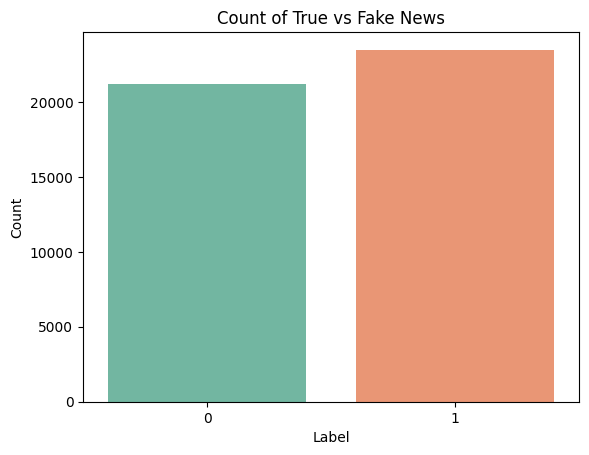

In [60]:
# count of number of true data vs fake data
sns.countplot(x='Label', data=df, palette='Set2')
plt.title('Count of True vs Fake News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.savefig('../Outputs/plots/Count_of_True_vs_Fake_News.png')
plt.show()

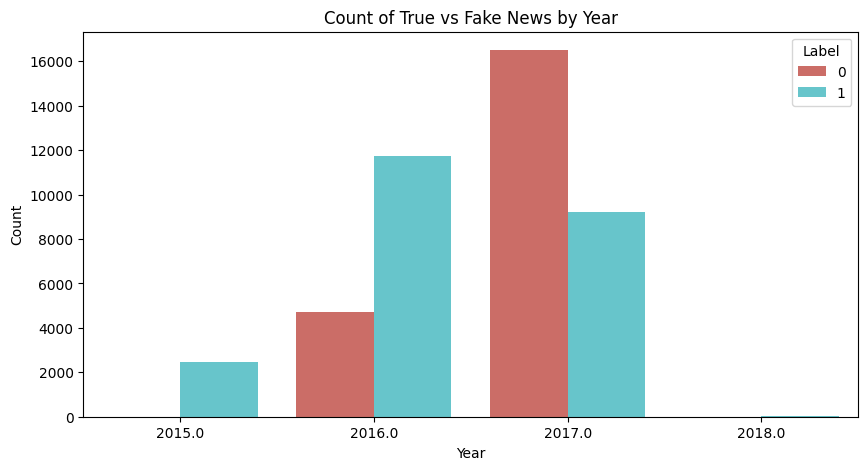

In [61]:
# count by year
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', hue='Label', data=df, palette='hls')
plt.title('Count of True vs Fake News by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label')
plt.savefig('../Outputs/plots/Count_of_True_vs_Fake_News_by_Year.png')
plt.show()

##### From the above graph, we can tell that there was a lot of fake news in 2016.

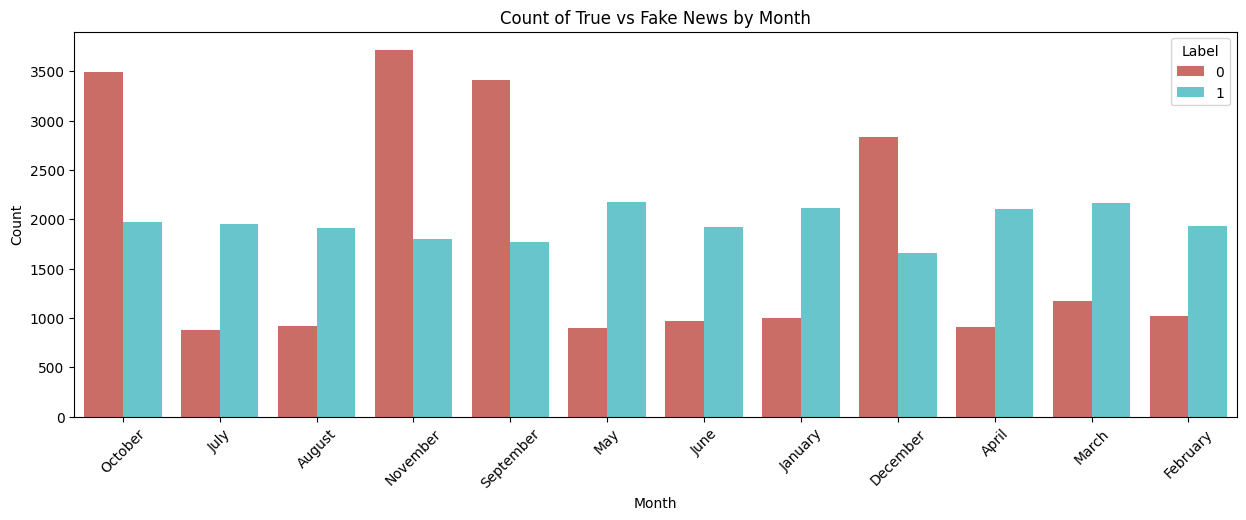

In [62]:
# Count by month
plt.figure(figsize=(15, 5))
sns.countplot(x='Month', hue='Label', data=df, palette='hls')
plt.title('Count of True vs Fake News by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.savefig('../Outputs/plots/Count_of_True_vs_Fake_News_by_Month.png')
plt.show()

##### From the above graph we can tell that the amount of fake news was almost evenly spread throughout the years.

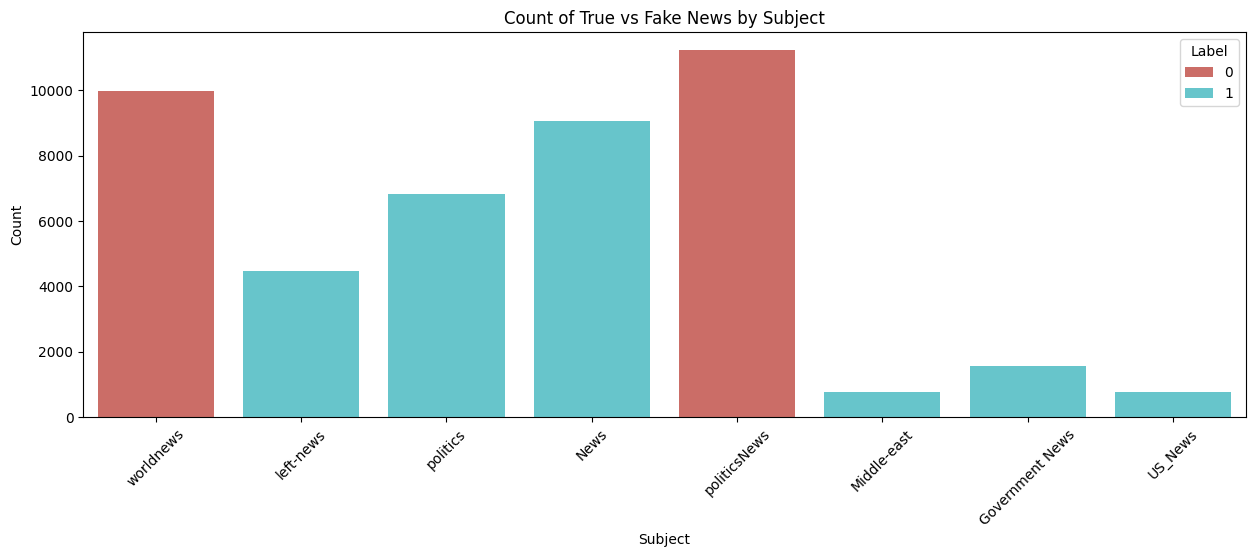

In [63]:
# Distribution by subject
plt.figure(figsize=(15, 5))
sns.countplot(x='Subject', hue='Label', data=df, palette='hls')
plt.title('Count of True vs Fake News by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.savefig('../Outputs/plots/Count_of_True_vs_Fake_News_by_Subject.png')
plt.show()

#### From the above graph, we can see the political news and world news do not have any fake data.

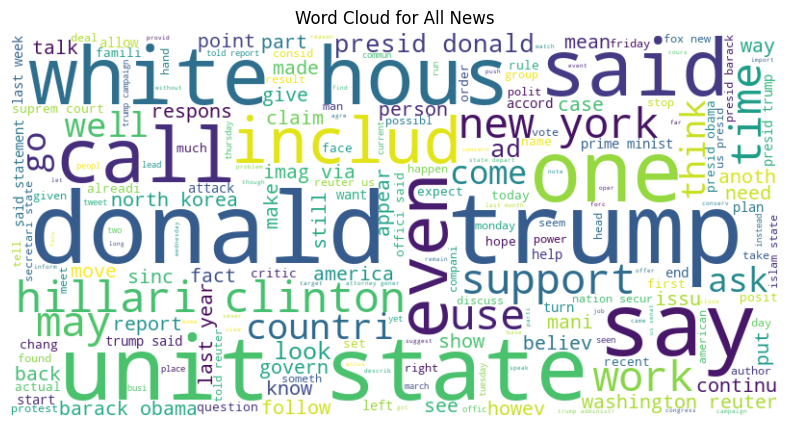

In [64]:
# Word Cloud for All News

text = " ".join(df['Text'].astype(str))
wordcloud_all = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All News')
plt.savefig('../Outputs/plots/Word_Cloud_for_All_News.png')
plt.show()

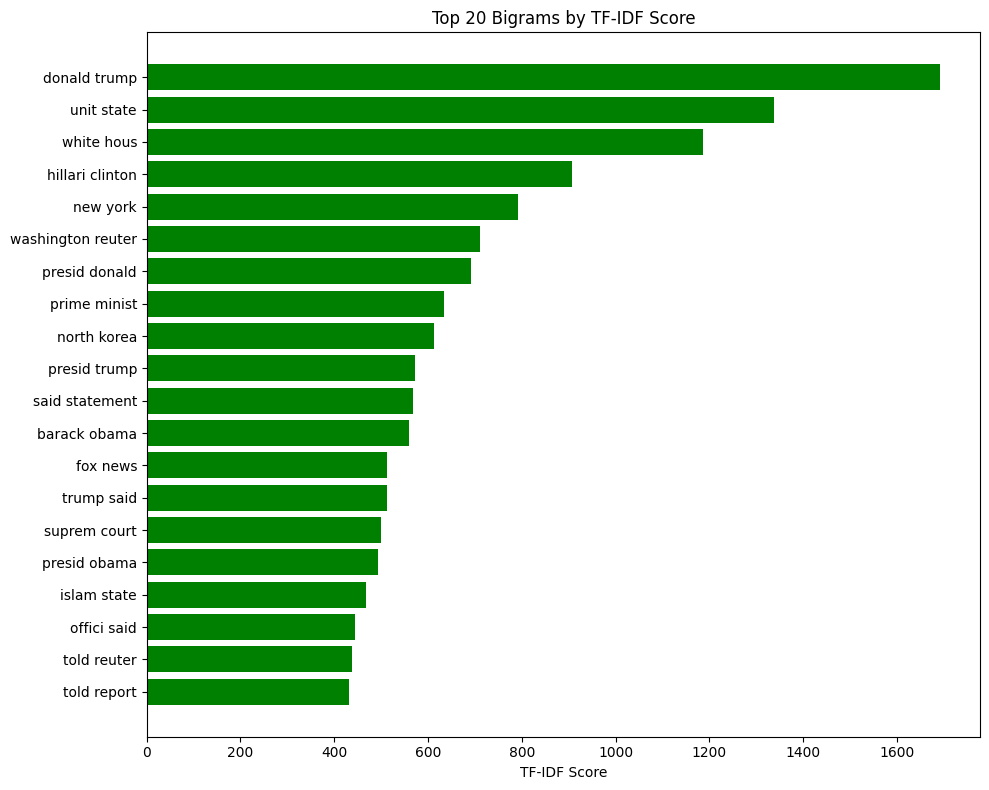

In [71]:
# Bigrams and TF-IDF

def get_top_n_bigram_tfidf(corpus, n=None):
    # Initialize TfidfVectorizer with bigram range
    tfidf_vec = TfidfVectorizer(ngram_range=(2, 2), max_features=2000, stop_words='english')
    tfidf_matrix = tfidf_vec.fit_transform(corpus)
    feature_names = tfidf_vec.get_feature_names_out()
    sum_tfidf = np.sum(tfidf_matrix.toarray(), axis=0)
    bigram_scores = [(feature_names[i], sum_tfidf[i]) for i in range(len(feature_names))]
    sorted_bigram_scores = sorted(bigram_scores, key=lambda x: x[1], reverse=True)
    return sorted_bigram_scores[:n]

top_tfidf_bigrams = get_top_n_bigram_tfidf(df['Text'], 20)

# Create DataFrame for visualization
df_tfidf_bigrams = pd.DataFrame(top_tfidf_bigrams, columns=['bigram', 'tfidf_score'])

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_tfidf_bigrams['bigram'], df_tfidf_bigrams['tfidf_score'], color='green')
plt.xlabel('TF-IDF Score')
plt.title('Top 20 Bigrams by TF-IDF Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../Outputs/plots/Top_20_Bigrams_by_TFIDF_Score.png')
plt.show()

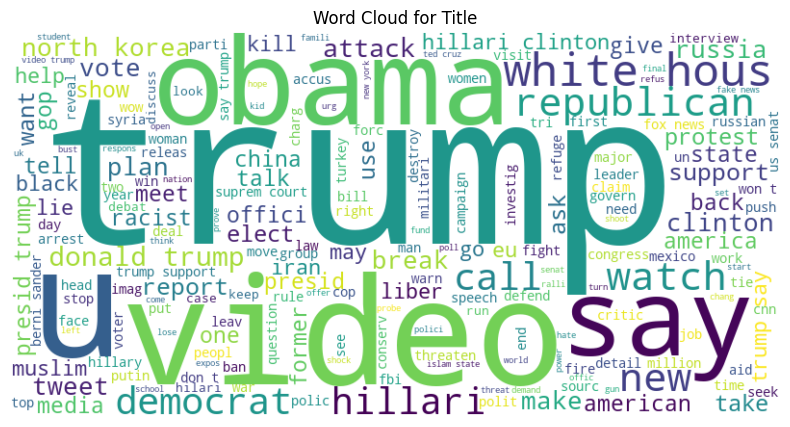

In [72]:
# Word Cloud for Title

text = " ".join(df['Title'].astype(str))
wordcloud_true = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Title')
plt.savefig('../Outputs/plots/Word_Cloud_for_Title.png')
plt.show()

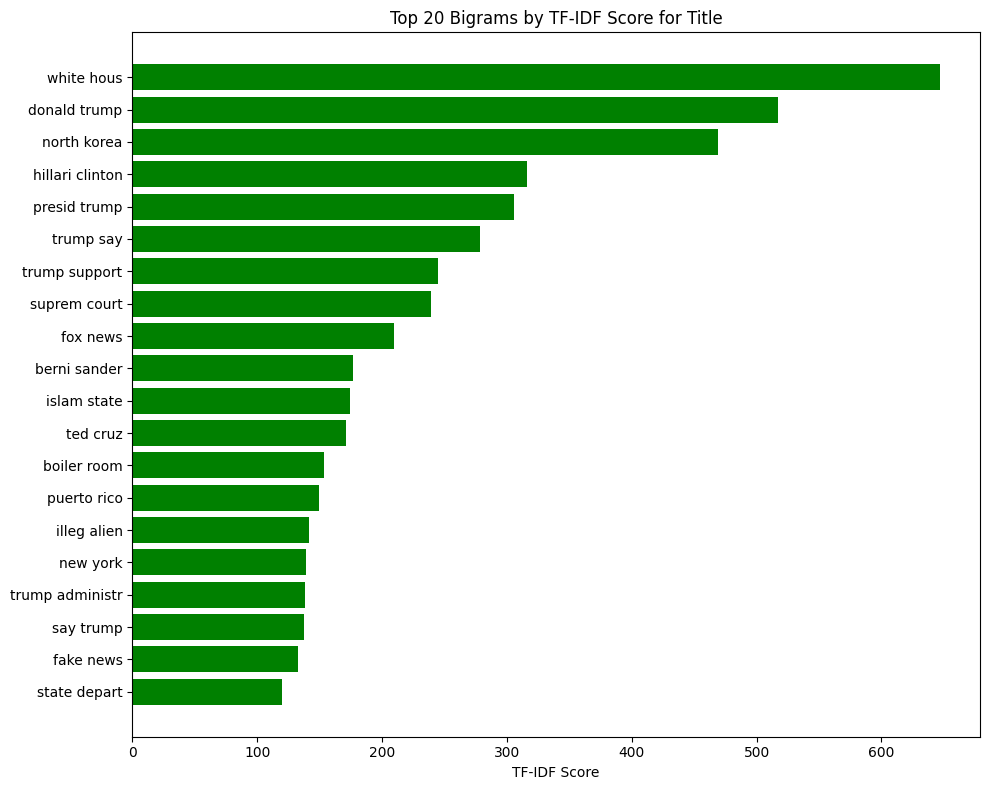

In [73]:
# tf-idf for title

# Handle missing values in the 'Title' column
df['Title'] = df['Title'].fillna('')

title_tdidf_bigams= get_top_n_bigram_tfidf(df['Title'], 20)

# Create DataFrame for visualization
df_title_tfidf_bigrams = pd.DataFrame(title_tdidf_bigams, columns=['bigram', 'tfidf_score'])

# plot
plt.figure(figsize=(10, 8))
plt.barh(df_title_tfidf_bigrams['bigram'], df_title_tfidf_bigrams['tfidf_score'], color='green')
plt.xlabel('TF-IDF Score')
plt.title('Top 20 Bigrams by TF-IDF Score for Title')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../Outputs/plots/Top_20_Bigrams_by_TFIDF_Score_for_Title.png')
plt.show()

In [74]:
# Sentiment Analysis

sia=SentimentIntensityAnalyzer()
res={}
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    text=row['Text']
    title=row['Title']
    res[title] = sia.polarity_scores(text)


100%|██████████| 44689/44689 [00:53<00:00, 829.70it/s]


In [75]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Title'})
vaders = vaders.merge(df, how='left')

In [77]:
# Polarity score function

def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

vaders['sentiment'] = vaders['compound'].apply(lambda val: polarity_score(val))

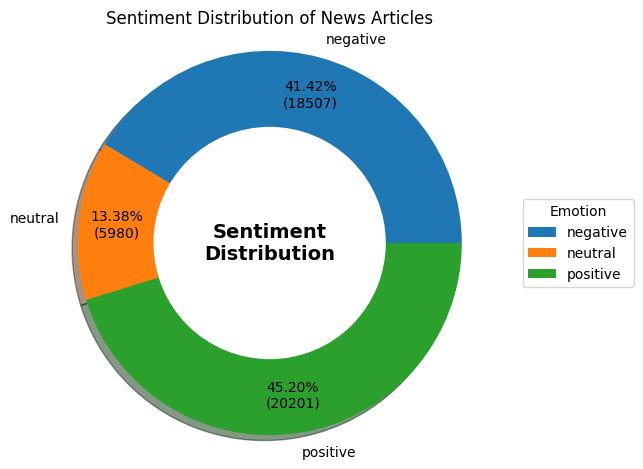

In [80]:
# Plotting the sentiment distribution

unique_emotion = vaders['sentiment'].unique()
explode = [0] * len(unique_emotion)
emotion_counts = vaders.groupby("sentiment").size()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    x=emotion_counts, 
    labels=emotion_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(emotion_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.8,
    explode=explode,  
    shadow=True
)
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)
ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold')
ax.legend(emotion_counts.index, title="Emotion", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal') 
plt.title('Sentiment Distribution of News Articles')
plt.tight_layout()
plt.savefig('../Outputs/plots/Sentiment_Distribution_of_News_Articles.png') 
plt.show()

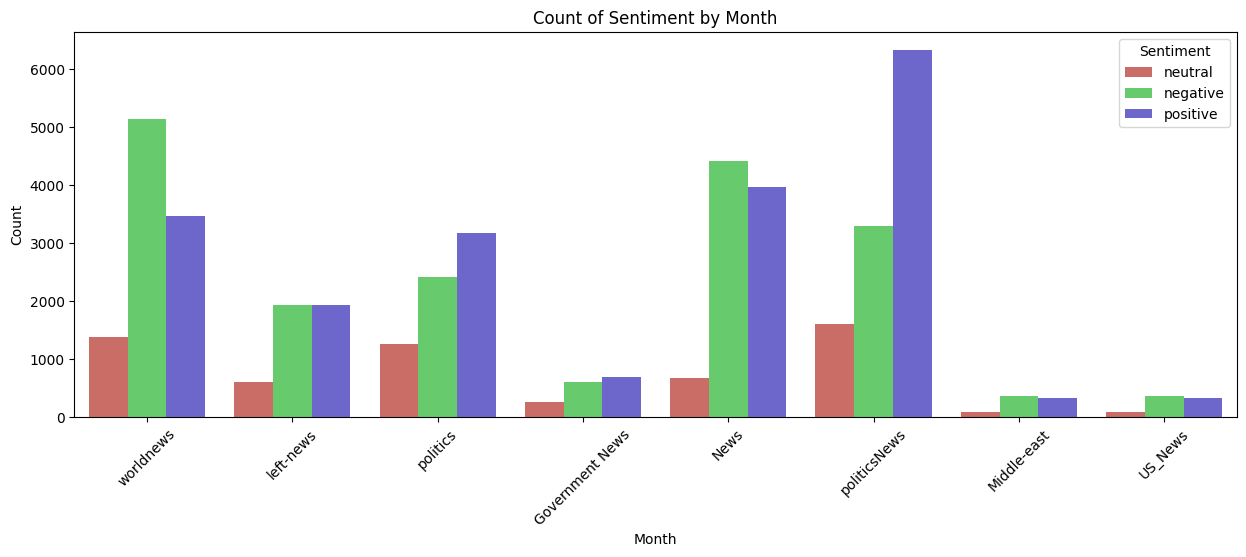

In [81]:
# Sentiment analysis by month plot by subject

plt.figure(figsize=(15, 5))
sns.countplot(x='Subject', hue='sentiment', data=vaders, palette='hls')
plt.title('Count of Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.savefig('../Outputs/plots/Count_of_Sentiment_by_Subject.png')
plt.show()

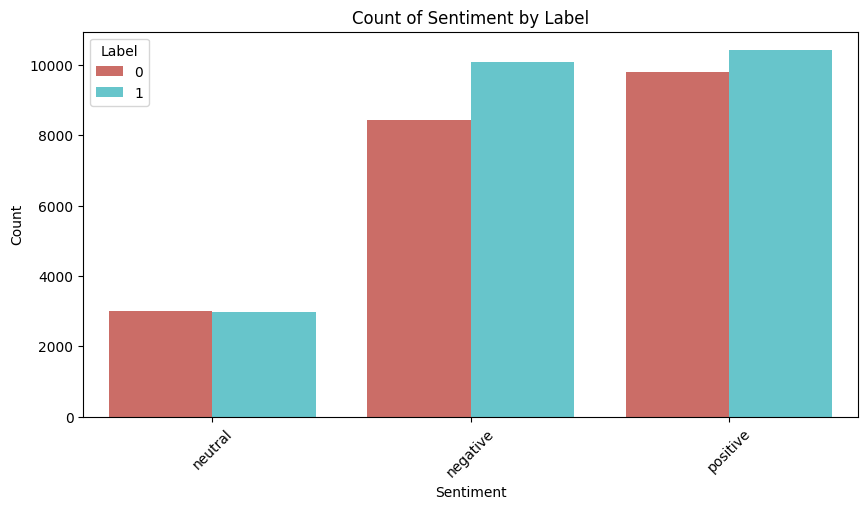

In [82]:
# countplot of total negative, positive and neutral texts

plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', hue='Label', data=vaders, palette='hls')
plt.title('Count of Sentiment by Label')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.savefig('../Outputs/plots/Count_of_Sentiment_by_Label.png')
plt.show()


In [83]:
# save vaders (data after sentimental analysis) to csv
vaders.to_csv('../data/vaders.csv', index=False)